檔案網址
https://www.superdatascience.com/machine-learning/

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [8]:
mypath = "Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression
  目錄： []
  檔案： ['data_preprocessing_template.py', 'data_preprocessing_template.R', 'Salary_Data.csv', 'simple_linear_regression.py', 'simple_linear_regression.R']
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/data_preprocessing_template.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/data_preprocessing_template.R
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/Salary_Data.csv
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/simple_linear_regression.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Simple_Linear_Regression/simple_linear_

In [9]:
datapath= mypath + '/'+ 'Salary_Data.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [10]:
testdata

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [71]:
x = testdata.iloc[:,:-1].values #左邊的 : 是整行line（0-9）,右邊的:-1是列columns,此數據x的:-1跟 0雖然一樣，但在最後fit時會影響到
y = testdata.iloc[:,1].values

In [81]:
y

array([  39343.,   46205.,   37731.,   43525.,   39891.,   56642.,
         60150.,   54445.,   64445.,   57189.,   63218.,   55794.,
         56957.,   57081.,   61111.,   67938.,   66029.,   83088.,
         81363.,   93940.,   91738.,   98273.,  101302.,  113812.,
        109431.,  105582.,  116969.,  112635.,  122391.,  121872.])

In [73]:
testdata.columns[0]

'YearsExperience'

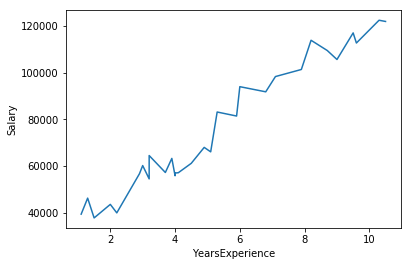

In [74]:
plt.xlabel(testdata.columns[0])
plt.ylabel(testdata.columns[1])
plt.plot(x,y)

In [75]:
from sklearn.cross_validation import train_test_split

In [107]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state = 0,)
#要一次定義四個變數
#第一第二個變數是要放array
#test_size，如果0.2，就是20%是test,80%是training

fitting simple linear regression to the training set

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
regressor = LinearRegression()

In [110]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

predicting the test set results

In [111]:
y_pred = regressor.predict(X_train)

visualising the training set result

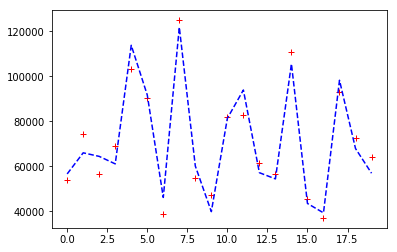

In [112]:
plt.plot(y_pred,'r+')
plt.plot(y_train,'b--')

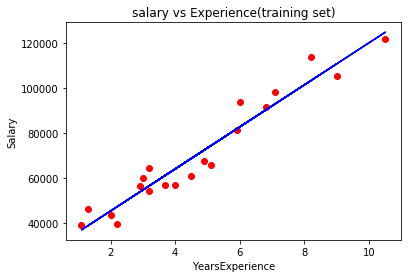

In [113]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')

plt.title('salary vs Experience(training set)')
plt.xlabel(testdata.columns[0])
plt.ylabel(testdata.columns[1])
plt.show()

visualising the test set result

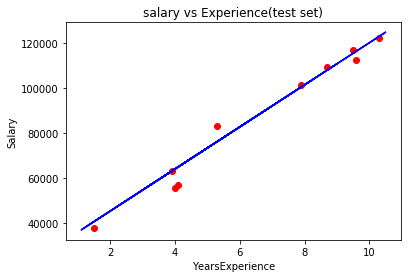

In [114]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue') #這裡的regressor.predict(X_train)不用改，因為本來就是用train來測試，若改了等於重做

plt.title('salary vs Experience(test set)')
plt.xlabel(testdata.columns[0])
plt.ylabel(testdata.columns[1])
plt.show()